Optimize an EMA in a strategy with three Supertrend indicators and STO RSI.

In [ ]:
pip install python-binance

In [ ]:
pip install ta

In [ ]:
pip install pandas_ta

Import Dataset

In [16]:
import pandas as pd
from binance.client import Client
import ta
import pandas_ta as pda
import matplotlib.pyplot as plt

client = Client(tld='us')

klinesT = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "01 October 2020", '2022-06-15')

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

del df['ignore']
del df['close_time']
del df['quote_av']
del df['trades']
del df['tb_base_av']
del df['tb_quote_av']

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
print(df)

                        open     high      low    close         volume
timestamp                                                             
2020-10-01 00:00:00   359.77   363.44   358.99   362.96   244.80951000
2020-10-01 04:00:00   363.36   363.81   360.22   363.47   957.11564000
2020-10-01 08:00:00   364.14   368.92   363.59   367.86    55.26582000
2020-10-01 12:00:00   368.89   368.89   361.22   361.64   142.97014000
2020-10-01 16:00:00   360.76   360.76   345.86   352.69   425.37798000
...                      ...      ...      ...      ...            ...
2022-06-14 08:00:00  1241.19  1243.85  1155.52  1174.22  4607.18940000
2022-06-14 12:00:00  1175.44  1258.14  1158.29  1251.12  3304.64978000
2022-06-14 16:00:00  1250.36  1266.73  1195.25  1207.26  1492.55048000
2022-06-14 20:00:00  1207.26  1220.70  1161.31  1207.02   825.81353000
2022-06-15 00:00:00  1207.79  1230.44  1168.97  1172.48   820.48738000

[3732 rows x 5 columns]


Backtest Execution

In [17]:
df.drop(df.columns.difference(['open','high','low','close','volume']), axis=1, inplace=True)
df['EMA90']=ta.trend.ema_indicator(df['close'], 90)
df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])
ST_length = 20
ST_multiplier = 3.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND1'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 20
ST_multiplier = 4.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND2'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 40
ST_multiplier = 8.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND3'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
df

,open,high,low,close,volume,EMA90,STOCH_RSI,SUPER_TREND1,SUPER_TREND_DIRECTION1,SUPER_TREND2,SUPER_TREND_DIRECTION2,SUPER_TREND3,SUPER_TREND_DIRECTION3
timestamp,,,,,,,,,,,,,
2020-10-01 00:00:00,359.77,363.44,358.99,362.96,244.80951000,NaN,NaN,0.000000,1,0.000000,1,0.000000,1
2020-10-01 04:00:00,363.36,363.81,360.22,363.47,957.11564000,NaN,NaN,NaN,1,NaN,1,NaN,1
2020-10-01 08:00:00,364.14,368.92,363.59,367.86,55.26582000,NaN,NaN,NaN,1,NaN,1,NaN,1
2020-10-01 12:00:00,368.89,368.89,361.22,361.64,142.97014000,NaN,NaN,NaN,1,NaN,1,NaN,1
2020-10-01 16:00:00,360.76,360.76,345.86,352.69,425.37798000,NaN,NaN,NaN,1,NaN,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-14 08:00:00,1241.19,1243.85,1155.52,1174.22,4607.18940000,1670.964690,0.540756,1364.206422,-1,1435.546896,-1,1629.584004,-1
2022-06-14 12:00:00,1175.44,1258.14,1158.29,1251.12,3304.64978000,1661.737334,1.000000,1364.206422,-1,1435.546896,-1,1629.584004,-1
2022-06-14 16:00:00,1250.36,1266.73,1195.25,1207.26,1492.55048000,1651.748821,0.863373,1364.206422,-1,1435.546896,-1,1629.584004,-1


Determine the best parameter

      i result
25  135   5020
26  140   5040
23  125   5048
24  130   5123
12   70   5202
11   65   5382
30  160   5437
9    55   5447
34  180   5454
5    35   5474
7    45   5474
6    40   5474
8    50   5474
27  145   5475
28  150   5508
32  170   5555
31  165   5555
10   60   5567
29  155   5627
13   75   5643
14   80   5653
22  120   5659
36  190   5762
35  185   5762
37  195   5762
21  115   5819
18  100   5826
1    15   5849
0    10   5885
33  175   5918
16   90   5960
4    30   6006
3    25   6006
2    20   6006
15   85   6065
17   95   6164
20  110   6418
19  105   6747


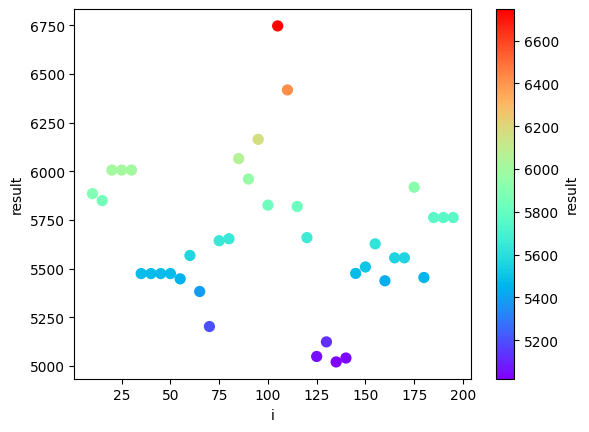

In [18]:
dt = None
dt = pd.DataFrame(columns = ['i', 'result'])
count=0

for i in range(10,200,5):

      df['EMA_i']=ta.trend.sma_indicator(df['close'], i)

      dfTest = df.copy()
      usdt = 1000
      coin = 0
      fee = 0.0007
      wallet = 1000

      for index, row in dfTest.iterrows():
          #BUY
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA_i'] and usdt > 0:
              buyPrice = row['close']
              coin = usdt/buyPrice
              coin = coin - fee*coin
              usdt = 0
              wallet = coin * row['close']
              #print("buy btc at ",df['close'][index]," || ",df['timestamp'][index], " || I have ",fiat,"$ and ",btc," btc")
          #SELL
          if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2 and coin > 0:
              sellPrice = row['close']
              usdt = coin*sellPrice
              usdt = usdt - fee*usdt
              coin = 0
              wallet = usdt
              #print("sell btc at ",df['close'][index]," || ",df['timestamp'][index], "|| I have ",fiat,"$ and ",btc," btc")
      myrow = {'i': i,'result': int(wallet)}
      myrow_df = pd.DataFrame([myrow])
      dt = pd.concat([dt, myrow_df], ignore_index=True)
print(dt.sort_values(by=['result']))
dt.plot.scatter(x='i',y='result',c='result',s=50,colormap='rainbow')
plt.show()

Period : [2020-10-01 00:00:00] -> [2022-06-15 00:00:00]
Starting balance : 1000 $
Final balance : 6116.7 $
Performance vs US Dollar : 511.67 %
Buy and Hold Performence : 223.03 %
Performance vs Buy and Hold : 129.41 %
Number of negative trades :  9
Number of positive trades :  14
Average Positive Trades :  21.81 %
Average Negative Trades :  -7.75 %
Best trade +70.41 %, the  2021-01-11 20:00:00
Worst trade -13.68 %, the  2021-12-04 12:00:00
Worst drawBack -34.0 %
Total fee :  137.23 $
PLOT


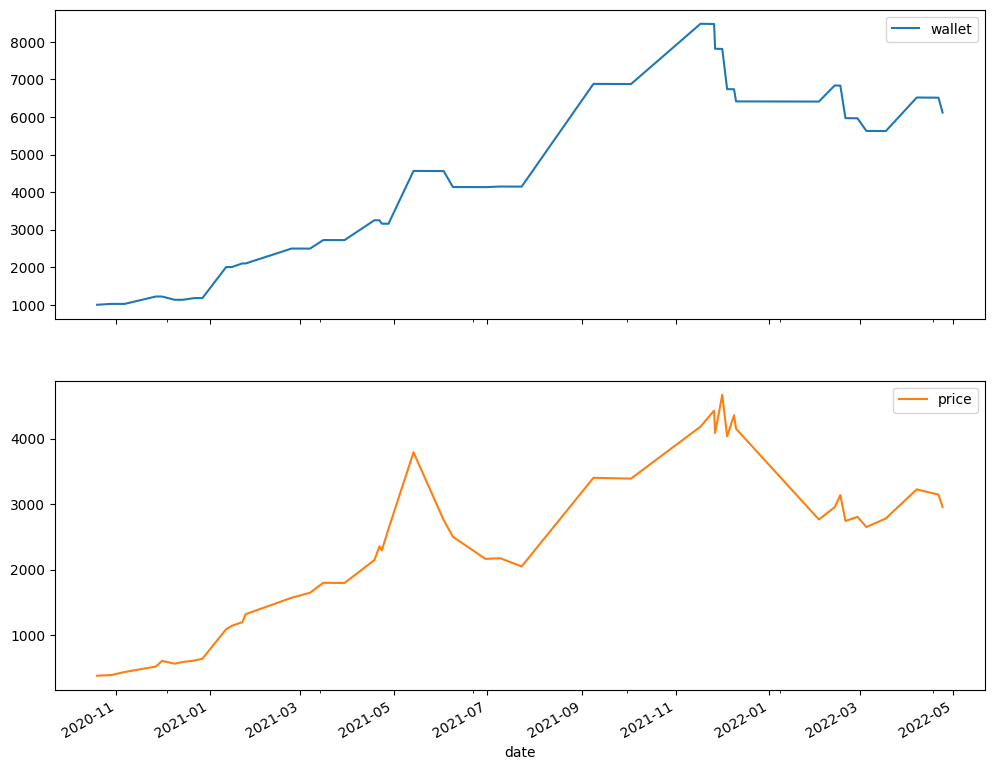

In [23]:
dfTest = df.copy()
# dfTest = df['2021-01-01':]

dt = None
dt = pd.DataFrame(columns = ['date','position', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])
dfTest['EMA105']=ta.trend.ema_indicator(df['close'], 105)

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
lastRow = dfTest.iloc[0]
fee = 0.0007
stopLoss = 0
goOn = True

for index, row in dfTest.iterrows():
  #Buy
  # if row['SUPER_TREND_DIRECTION'] == 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA50'] and usdt > 0:
  if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < 0.8 and row['close']>row['EMA105'] and usdt > 0 and goOn == True:
    buyPrice = row['close']
    #stopLoss = buyPrice - 0.02 * buyPrice
    coin = usdt / buyPrice
    frais = fee * coin
    coin = coin - frais
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",buyPrice,'$ the', index)
    myrow = {'date': index,'position': "Buy",'price': buyPrice,'frais': frais * row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt.loc[len(dt)] = myrow


  #Stop Loss
  #elif row['low'] < stopLoss and coin > 0:
  #   sellPrice = stopLoss
  #   usdt = coin * sellPrice
  #   frais = 0.005 * usdt
  #   usdt = usdt - frais
  #   coin = 0
  #   goOn = False
  #   wallet = usdt
  #   if wallet > lastAth:
  #     lastAth = wallet
  #   # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
  #   myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
  #   dt.loc[len(dt)] = myrow

  # Sell
  elif row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1 and row['STOCH_RSI'] > 0.2:
    goOn = True
    if coin > 0:
      sellPrice = row['close']
      usdt = coin * sellPrice
      frais = fee * usdt
      usdt = usdt - frais
      coin = 0
      wallet = usdt
      if wallet > lastAth:
        lastAth = wallet
      # print("Sell COIN at",sellPrice,'$ the', index)
      myrow = {'date': index,'position': "Sell",'price': sellPrice,'frais': frais,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
      dt.loc[len(dt)] = myrow

  lastRow = row

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")

dt[['wallet','price']].plot(subplots=True, figsize=(12,10))
print('PLOT')
# dt